<a href="https://colab.research.google.com/github/SaulHL08/Notebooks-Datos-Masivos/blob/main/EjercicioSeriesTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio Series Series de Tiempo
## Curso Ingeniería de Datos Masivos
## Tec Milenio

In [ ]:
# importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# leyendo datos
data = pd.read_csv('sales-of-shampoo.csv')
print(data.head())

        Month  Sales
0  2011-01-01  266.0
1  2011-02-01  145.9
2  2011-03-01  183.1
3  2011-04-01  119.3
4  2011-05-01  180.3


In [ ]:
#Convirtiendo a fechas y poniendo índice de fechas

# Convertir la columna 'Month' a formato datetime
data['Month'] = pd.to_datetime(data['Month'])

# Establecer la columna 'Month' como índice
data.set_index('Month', inplace=True)

# Mostrar las primeras filas del DataFrame con el nuevo índice
print(data.head())


            Sales
Month            
2011-01-01  266.0
2011-02-01  145.9
2011-03-01  183.1
2011-04-01  119.3
2011-05-01  180.3


In [ ]:
# describiendo datos
data_description = data.describe()

# Mostrar la descripción de los datos
print(data_description)

            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000


In [ ]:
serie_tiempo = data['Sales']
serie_tiempo.head()

Month
2011-01-01    266.0
2011-02-01    145.9
2011-03-01    183.1
2011-04-01    119.3
2011-05-01    180.3
Name: Sales, dtype: float64

### 1. Checar la estacionalidad de la Serie de Tiempo

Un Serie de Tiempo es estacionaria si sus propiedades estadísticas como la media, la varianza permanecen constantes en el tiempo y una autocovarianza que no depende del tiempo.

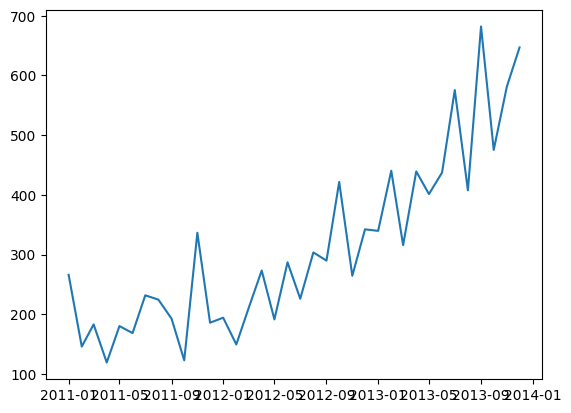

In [ ]:
plt.plot(serie_tiempo)
plt.show()

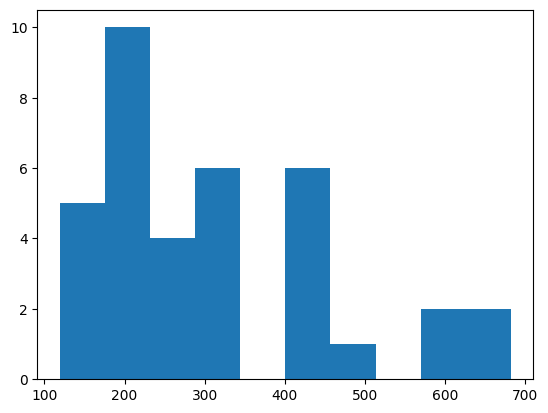

In [ ]:
# Histograma de los datos
plt.hist(serie_tiempo)
plt.show()


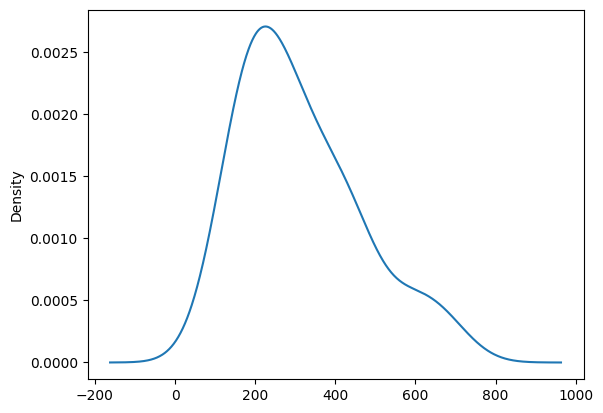

In [ ]:
# Estimación de la función de distribución de probabilidad

#La densidad de probabilidad es la relación entre las observaciones y su probabilidad.

#Algunos resultados de una variable aleatoria tendrán baja densidad de probabilidad y
#otros resultados tendrán una alta densidad de probabilidad.

# Es útil conocer la función de densidad de probabilidad  de datos
# para saber si una observación dada es improbable, tan improbable como para considerarse un valor atípico o una anomalía
# y si debe eliminarse.

serie_tiempo.plot(kind = 'kde')
plt.show()

In [ ]:


def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 3).mean()
    rolstd = timeseries.rolling(window = 3).std()

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()



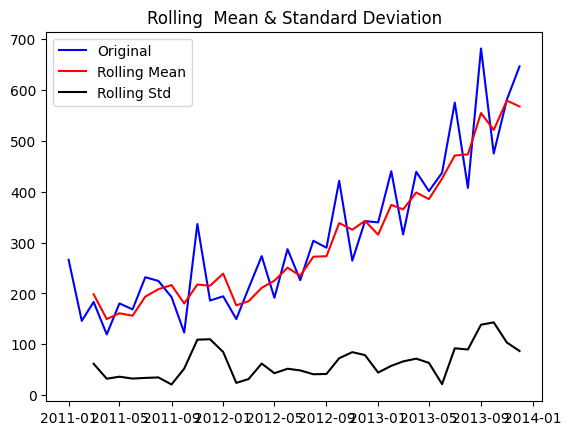

In [ ]:
test_stationarity(serie_tiempo)

La desviación estándar tiene una variación muy menor, pero la media aumenta continuamente. Por lo tanto, no es una serie estacionaria.

### 2. Hacer la Serie de Tiempo Estacionaria

In [ ]:
# Aplicando logaritmo
serie_tiempo_log = np.log(data['Sales'])

# Mostrar las primeras filas de la serie temporal logaritmizada
print(serie_tiempo_log.head())

Month
2011-01-01    5.583496
2011-02-01    4.982921
2011-03-01    5.210032
2011-04-01    4.781641
2011-05-01    5.194622
Name: Sales, dtype: float64


#### Promedios móviles


In [ ]:
# Agrega tu código de promedios móviles
promedio_movil = serie_tiempo_log.rolling(window=3).mean()

# Mostrar las primeras filas del promedio móvil
print(promedio_movil.head())

Month
2011-01-01         NaN
2011-02-01         NaN
2011-03-01    5.258817
2011-04-01    4.991532
2011-05-01    5.062099
Name: Sales, dtype: float64


### 3. Eliminando Tendencia y Estacionalidad

In [ ]:
# Calcular la diferencia de la serie temporal logaritmizada
serie_tiempo_log_diff = serie_tiempo_log - serie_tiempo_log.shift()

# Eliminar el primer valor NaN resultante de la diferenciación
serie_tiempo_log_diff = serie_tiempo_log_diff.dropna()

# Descomposición de la serie temporal diferenciada
decomposition_diff = seasonal_decompose(serie_tiempo_log_diff)

# Obtener las componentes: tendencia, estacionalidad y residuo
tendencia_diff = decomposition_diff.trend
estacionalidad_diff = decomposition_diff.seasonal
residuo_diff = decomposition_diff.resid

# Mostrar las primeras filas de cada componente
print("Tendencia después de diferenciación:")
print(tendencia_diff.head())

print("\nEstacionalidad después de diferenciación:")
print(estacionalidad_diff.head())

print("\nResiduo después de diferenciación:")
print(residuo_diff.head())


Tendencia después de diferenciación:
Month
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
2011-06-01   NaN
Name: trend, dtype: float64

Estacionalidad después de diferenciación:
Month
2011-02-01   -0.009910
2011-03-01   -0.012027
2011-04-01    0.264576
2011-05-01   -0.240203
2011-06-01    0.230964
Name: seasonal, dtype: float64

Residuo después de diferenciación:
Month
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
2011-06-01   NaN
Name: resid, dtype: float64


### Haciendo Pronóstico con Series de Tiempo

In [ ]:
#ACF plot
#pd.plotting.autocorrelation_plot()
#plt.show()

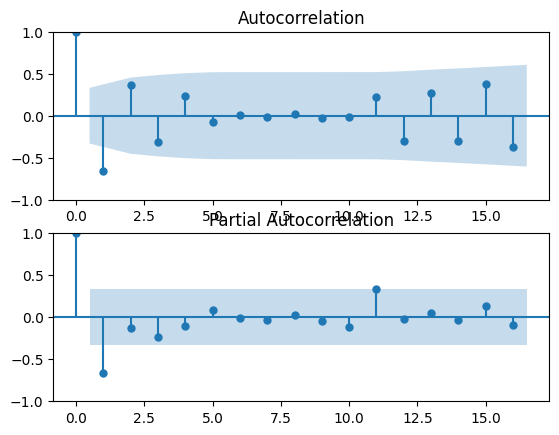

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

plt.subplot(211)
plot_acf(serie_tiempo_log_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(serie_tiempo_log_diff, ax=plt.gca())
plt.show()

In [ ]:
#Another method
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(serie_tiempo_log_diff, nlags=3)
lag_pacf = pacf(serie_tiempo_log_diff, nlags=3, method='ols')

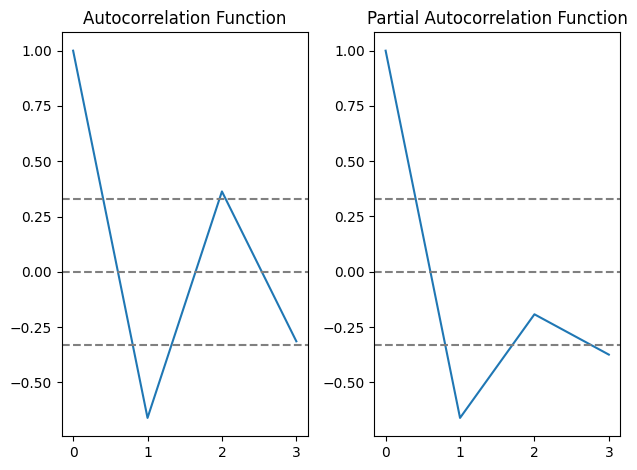

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

#### AR Model

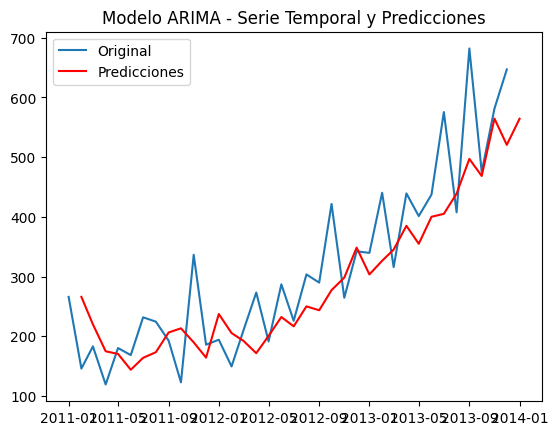

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Especificar el orden del modelo ARIMA (p, d, q)
# Aquí debes proporcionar valores para p, d, q
# Por ejemplo, (1, 1, 1) para un modelo ARIMA(1, 1, 1)
p, d, q = 1, 1, 1

# Crear y ajustar el modelo ARIMA
modelo_arima = ARIMA(serie_tiempo_log, order=(p, d, q))
resultados_arima = modelo_arima.fit()

# Obtener las predicciones y convertirlas de nuevo a la escala original
predicciones = resultados_arima.predict(start=1, end=len(serie_tiempo_log), typ='levels')
predicciones = np.exp(predicciones)

# Graficar la serie temporal logaritmizada y las predicciones
plt.plot(serie_tiempo, label='Original')
plt.plot(predicciones, color='red', label='Predicciones')
plt.title('Modelo ARIMA - Serie Temporal y Predicciones')
plt.legend()
plt.show()


#### MA Model

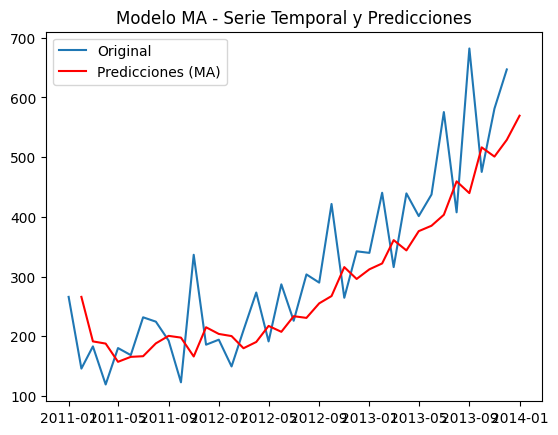

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Especificar el orden del modelo MA (p, d, q)
# Aquí debes proporcionar valores para p, d, q
# Por ejemplo, (0, 1, 1) para un modelo MA(1)
p, d, q = 0, 1, 1

# Crear y ajustar el modelo MA
modelo_ma = ARIMA(serie_tiempo_log, order=(p, d, q))
resultados_ma = modelo_ma.fit()

# Obtener las predicciones y convertirlas de nuevo a la escala original
predicciones_ma = resultados_ma.predict(start=1, end=len(serie_tiempo_log), typ='levels')
predicciones_ma = np.exp(predicciones_ma)

# Graficar la serie temporal logaritmizada y las predicciones del modelo MA
plt.plot(serie_tiempo, label='Original')
plt.plot(predicciones_ma, color='red', label='Predicciones (MA)')
plt.title('Modelo MA - Serie Temporal y Predicciones')
plt.legend()
plt.show()


#### Model Combinado

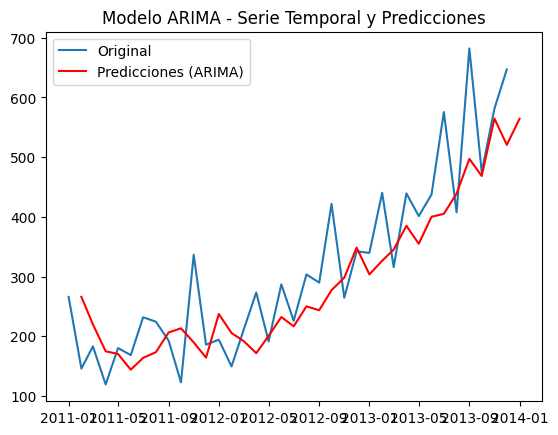

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Especificar el orden del modelo ARIMA (p, d, q)
# Aquí debes proporcionar valores para p, d, q
# Por ejemplo, (1, 1, 1) para un modelo ARIMA(1, 1, 1)
p, d, q = 1, 1, 1

# Crear y ajustar el modelo ARIMA
modelo_arima = ARIMA(serie_tiempo_log, order=(p, d, q))
resultados_arima = modelo_arima.fit()

# Obtener las predicciones y convertirlas de nuevo a la escala original
predicciones_arima = resultados_arima.predict(start=1, end=len(serie_tiempo_log), typ='levels')
predicciones_arima = np.exp(predicciones_arima)

# Graficar la serie temporal logaritmizada y las predicciones del modelo ARIMA
plt.plot(serie_tiempo, label='Original')
plt.plot(predicciones_arima, color='red', label='Predicciones (ARIMA)')
plt.title('Modelo ARIMA - Serie Temporal y Predicciones')
plt.legend()
plt.show()


Los modelos AR y MA tienen casi el mismo RSS pero combinados es significativamente mejor.

#### Regresando a la Serie de Tiempo Original

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Especificar los rangos máximos para p, d, y q
maxp = 3
maxd = 3
maxq = 3

# Inicializar la lista para almacenar los valores de AIC
aic = []

# Bucle para iterar sobre las combinaciones de p, d, y q
for p in range(maxp+1):
    for d in range(maxd+1):
        for q in range(maxq+1):
            try:
                # Crear y ajustar el modelo ARIMA
                modelo_arima = ARIMA(serie_tiempo_log, order=(p, d, q))
                resultados_arima = modelo_arima.fit(disp=0)

                # Obtener el AIC y almacenarlo en la lista
                aic.append((p, d, q, resultados_arima.aic))

            except Exception as e:
                # Imprimir el error específico
                print(f"Error en combinación (p, d, q): {p}, {d}, {q}. Error: {e}")

# Verificar si se encontraron combinaciones válidas
if not aic:
    print("No se encontraron combinaciones válidas. Revisar errores anteriores.")
else:
    # Encontrar la combinación de parámetros con el menor AIC
    min_aic = min(aic, key=lambda x: x[3])

    print(f"Mejor combinación de parámetros (p, d, q): {min_aic[0]}, {min_aic[1]}, {min_aic[2]}")
    print(f"AIC correspondiente: {min_aic[3]}")


Error en combinación (p, d, q): 0, 0, 0. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 0, 1. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 0, 2. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 0, 3. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 1, 0. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 1, 1. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 1, 2. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 1, 3. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 2, 0. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
Error en combinación (p, d, q): 0, 2, 1. Error: ARIMA.fit() got an unexpected keyw

In [ ]:
### Selecciona el modelo ARIMA con los valores p, d q con menor error
### Usar modelo para hacer predicciones